# Regresja wielokrotna 

- regresja wielokrotna
- jakość dopasowania

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson

import matplotlib.pyplot as plt

In [2]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)
carseats_df = carseats.data

## Zadanie 1

1. Wyznacz liniową funkcję regresji opisującą zależność sprzedaży (`Sales`) od wysokości budżetu na reklamę (`Advertising`) i ceny (`Price`).


2. Zweryfikuj dopasowanie modelu `Sales ~ Advertising + Price`:
    
    a) Czy istnieje związek między zmienną zależną a przynajmniej jedną ze zmiennych niezależnych? Jeśli tak, to z którą (z którymi)?
       
    b) Czy wyraz wolny jest istotny w modelu?
       
    c) Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
       
3. Wyznacz model liniowy najlepiej opisujący zależność sprzedaży fotelików samochodowych od pozostałych dostępnych zmiennych:
    
      a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
       
      b) Dla których zmiennych niezależnych $X_j$, $j=1,\ldots,10$ można odrzucić hipotezę zerową  $H_0: \beta_j = 0$?
       
      c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
       
      d) Porównaj dopasowanie obu modeli (większego i mniejszego).
       
       
4. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Sales': np.NaN, 
    'CompPrice': [125.0], 
    'Income': [70.0], 
    'Advertising': [5.0], 
    'Population': [270.0], 
    'Price': [120.0],
    'ShelveLoc': ['Medium'], 
    'Age': [54.0], 
    'Education': [15.0], 
    'Urban': ['Yes'], 
    'US': ['Yes']
})`

5. Oceń jakość dopasowania.

In [3]:
model = smf.ols('Sales~Price+Advertising', data=carseats_df).fit()
print(model.summary())

print("Wartość statystyki testowej testu F (F-statistic): {}".format(model.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(model.f_pvalue))
print("\n")


print("Wartość statystki testu t-Studenta")
print(model.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(model.pvalues)
print("\n")


print("Współczynnik determinacji R2 (R-squared): {}".format(model.rsquared))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     77.91
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.87e-29
Time:                        11:18:39   Log-Likelihood:                -916.14
No. Observations:                 400   AIC:                             1838.
Df Residuals:                     397   BIC:                             1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0034      0.607     21.428      

In [4]:
columns = list(carseats_df.columns)
columns.remove('Sales')

features = "+".join(columns)
print(features)

model = smf.ols('Sales~'+features, data=carseats_df)
fitted = model.fit()
fitted.summary()

CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.60e-166
Time:                        11:26:41   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
print("Wartość statystyki testowej testu F (F-statistic): {}".format(fitted.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(fitted.f_pvalue))
print("\n")

print("Wartość statystki testu t-Studenta")
print(fitted.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(fitted.pvalues)

Wartość statystyki testowej testu F (F-statistic): 243.37218067933568
P-wartość testu F (Prob (F-statistic)): 1.59926509010143e-166


Wartość statystki testu t-Studenta
Intercept               9.380455
ShelveLoc[T.Good]      31.677773
ShelveLoc[T.Medium]    15.516473
Urban[T.Yes]            1.087720
US[T.Yes]              -1.228577
CompPrice              22.377799
Income                  8.564677
Advertising            11.066035
Population              0.561139
Price                 -35.700171
Age                   -14.471810
Education              -1.070046
dtype: float64


P-wartości testu t-Studenta
Intercept               5.596251e-19
ShelveLoc[T.Good]      1.192737e-109
ShelveLoc[T.Medium]     1.383807e-42
Urban[T.Yes]            2.773938e-01
US[T.Yes]               2.199750e-01
CompPrice               7.935340e-72
Income                  2.579912e-16
Advertising             6.353734e-25
Population              5.750270e-01
Price                  1.175168e-124
Age                 

In [6]:
np.array(model.exog_names)[fitted.pvalues < 0.05]

array(['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]',
       'CompPrice', 'Income', 'Advertising', 'Price', 'Age'], dtype='<U19')

In [38]:
fitted_red = smf.ols('Sales~ShelveLoc+CompPrice+Income+Advertising+Price+Age', data=carseats_df).fit()
fitted_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.25e-170
Time:                        12:21:04   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752      0.505     10.842      0.000       4.482       6.468
ShelveLoc[T.Good]       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc[T.Medium]     1.9520      0.125     15.569      0.000       1.706       2.198
CompPrice               0.0926      0.004     22.451      0.000       0.084       0.101
Income                  0.0158      0.002      8.590      0.000       0.012       0.019
Advertising             0.1159      0.008     15.006      0.000       0.101       0.131
Price                  -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                    -0.0461      0.003    -14.521      0.000      -0.052      -0.040
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted.rsquared))
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_red.rsquared))

Współczynnik determinacji R2 (R-squared): 0.8734133434127012
Współczynnik determinacji R2 (R-squared): 0.871982496884308


In [39]:
#predykcja
new_obs = pd.DataFrame({ 'Sales': np.NaN, 'CompPrice': [125.0], 'Income': [70.0],
              'Advertising': [5.0], 'Population': [270.0], 'Price': [120.0], 'ShelveLoc': ['Medium'], 'Age': [54.0],
              'Education': [15.0], 'Urban': ['Yes'], 'US': ['Yes'] })

fitted_red.predict(new_obs).to_list()[0]

6.753956750903727

# Graficzna ewaluacja modeli regresji: 
- wykres wartości przewidywanych względem prawdziwych
- wykres residuów względem wartości dopasowanych

### Wykres wartości przewidywanych względem prawdziwych

$(y_i, \hat{y}_i)$ - wykres wartości przewidywanych względem prawdziwych.

Przy idealnym dopasowaniu, punkty powinny się układać na prostej y=x.

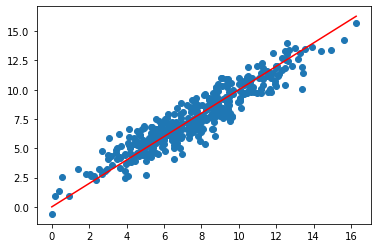

In [17]:
Ylin = np.linspace(carseats_df['Sales'].min(), carseats_df['Sales'].max(), 100)
plt.scatter(carseats.data['Sales'], fitted_red.fittedvalues)
plt.plot(Ylin, Ylin, color='red')
plt.show()

## Wykres rezyduów:

1. $(i,e_i)$,

2. $(\hat{y}_i,e_i)$.

Oba wykresy powinny układać się wokół zera, bo błędy modelu mają średnią 0. Wspólna wariancja powinna się wyrażać tym, że żadna podgrupa punktów nie łapie większego odchylenia od prostej $y=0$

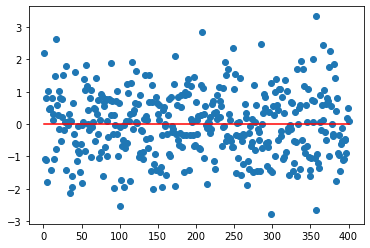

In [13]:
#1. (i, e_i)
xrang = np.arange(1, len(fitted_red.resid) + 1)
plt.scatter(xrang, fitted_red.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')

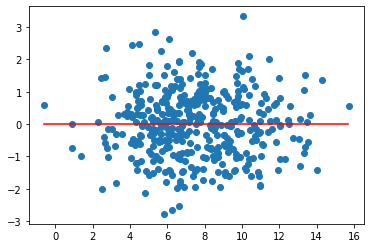

In [14]:
#2. (\hat{y}_i, e_i)
xrang = np.arange(fitted_red.fittedvalues.min(), fitted_red.fittedvalues.max(), 0.1)
plt.scatter(fitted_red.fittedvalues, fitted_red.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')

### Wykres kwantylowy dla reszt 

Do badania normalności błędów (reszty teoretyczne vs. reszty empiryczne).

Wykres powinnien układać sie na prostej $y=x$.

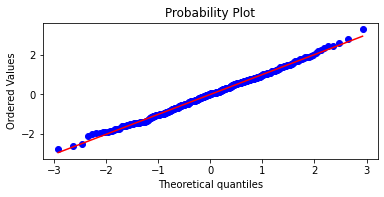

In [15]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(fitted_red.resid, plot=ax, dist ='norm', fit=True)
plt.show()

# Zadanie 2 

1. Wczytać dane `realest.csv`, które zawierają informacje na temat domów na przedmieściach Chicago: cena domu (`Price`), liczba sypialni (`Bedroom`), powierzchnia w stopach kwadratowych (`Space`), liczba pokoi (`Room`), szerokość frontu działki w stopach (`Lot`), roczny podatek od nieruchomości (`Tax`), liczba łazienek (`Bathroom`), liczba miejsc parkingowych w garażu (`Garage`) i stan domu (`Condition`, 0-dobry, 1-wymaga remontu).
       
2. Wyznacz model liniowy najlepiej opisujący zależność ceny domu od pozostałych zmiennych w zbiorze:
    
      a) Czy istnieje związek pomiędzy zmienną zależną a którąkolwiek ze zmiennych niezależnych?
       
      b) Dla których zmiennych niezależnych $X_j$, $j=1,\ldots,10$ można odrzucić hipotezę zerową  $H_0: \beta_j = 0$?
       
      c) Biorąc pod uwagę odpowiedź na poprzednie pytanie, wyznacz mniejszy model w oparciu tylko o zmienne, które faktycznie mają istotny wpływ na wielkość sprzedaży.
       
      d) Porównaj dopasowanie obu modeli (większego i mniejszego).
  
3. Jaki wpływ na cenę ma zwiększenie liczby sypialni o 1, 
 kiedy wartości wszystkich pozostałych zmiennych objaśniających są ustalone? 
 Znaleźć uzasadnienie tego pozornie błędnego wyniku. Porównać ten wynik  z wynikiem otrzymanym dla modelu liniowego opisującego zależność ceny domu jedynie od liczby sypialni.  

4. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Price': np.NaN, 
    'Bedroom': [3.0], 
    'Space': [1100], 
    'Room': [6.0], 
    'Lot': [32.0], 
    'Tax': [911.0],
    'Bathroom': [1.5], 
    'Garage': [1.0], 
    'Condition': [0.0]
})`

5. Oceń jakość dopasowania.

In [18]:
# 1

realest = pd.read_csv('../../data/realest.csv')
print(realest)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]


In [19]:
# istnieją wartości NaN --> wyrzućmy je

realest = realest.dropna(axis=0)
print(realest)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
149   32.0      4.0  1065.0   7.0  25.0   492.0       1.5     0.0        0.0
151   42.0      3.0   585.0   5.0  50.0   713.0       1.0     0.0        0.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0

[128 rows x 9 columns]


In [40]:
# model ze wszystkimi zmiennymi (2a)

columns = list(realest.columns)
columns.remove('Price')

features = "+".join(list(columns))
print(features)

model = smf.ols('Price~'+features, data=realest)
fitted = model.fit()
fitted.summary()

Bedroom+Space+Room+Lot+Tax+Bathroom+Garage+Condition


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     37.90
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.76e-29
Time:                        12:21:32   Log-Likelihood:                -431.77
No. Observations:                 128   AIC:                             881.5
Df Residuals:                     119   BIC:                             907.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9935      4.081      4.899      0.000      11.912      28.075
Bedroom       -3.1602      0.931     -3.394      0.001      -5.004      -1.317
Space          0.0097      0.004      2.611      0.010       0.002       0.017
Room           1.6890      1.120      1.508      0.134      -0.529       3.907
Lot            0.2362      0.090      2.634      0.010       0.059       0.414
Tax            0.0044      0.003      1.490      0.139      -0.001       0.010
Bathroom       6.3758      2.018      3.160      0.002       2.380      10.371
Garage         4.1448      0.956      4.337      0.000       2.253       6.037
Condition      1.8358      1.797      1.021      0.309      -1.723       5.394
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.361
Skew:                           0.120   Prob(JB):                        0.835
Kurtosis:                       2.899   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# 2b i 2c

subset_features = '+'.join(np.array(model.exog_names)[fitted.pvalues < 0.05][1:])

fitted_red = smf.ols('Price~'+subset_features, data=realest).fit()
fitted_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     59.40
Date:                Sun, 21 May 2023   Prob (F-statistic):           4.59e-31
Time:                        12:21:36   Log-Likelihood:                -433.86
No. Observations:                 128   AIC:                             879.7
Df Residuals:                     122   BIC:                             896.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.9651      2.689      9.655      0.000      20.642      31.289
Bedroom       -2.6740      0.638     -4.193      0.000      -3.936      -1.411
Space          0.0154      0.002      7.954      0.000       0.012       0.019
Lot            0.2792      0.086      3.251      0.001       0.109       0.449
Bathroom       6.2081      1.669      3.720      0.000       2.904       9.512
Garage         4.6954      0.885      5.308      0.000       2.944       6.447
==============================================================================
Omnibus:                        0.463   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.606
Skew:                           0.116   Prob(JB):                        0.739
Kurtosis:                       2.756   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# 2d

print("Współczynnik determinacji R2 (R-squared): {}".format(fitted.rsquared))
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_red.rsquared))

Współczynnik determinacji R2 (R-squared): 0.7181656659650733
Współczynnik determinacji R2 (R-squared): 0.708820511203659


In [43]:
# model tylko ze zmienną Bedroom (3) --> wcześniej był ujemny współczynnik w dopasowaniu liniowym

fitted_red2 = smf.ols('Price~Bedroom', data=realest).fit()
fitted_red2.summary()  # tym razem dodatnia korelacja (bo poprzednio zostawialiśmy WSZYSTKIE pozostałe cechy niezmienione)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     14.54
Date:                Sun, 21 May 2023   Prob (F-statistic):           0.000214
Time:                        12:21:41   Log-Likelihood:                -505.84
No. Observations:                 128   AIC:                             1016.
Df Residuals:                     126   BIC:                             1021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8643      2.817     16.634      0.000      41.289      52.440
Bedroom        3.0840      0.809      3.813      0.000       1.483       4.685
==============================================================================
Omnibus:                        4.305   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                2.545
Skew:                          -0.108   Prob(JB):                        0.280
Kurtosis:                       2.344   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# 4

new_obs = pd.DataFrame({
 'Price': np.NaN, 
 'Bedroom': [3.0], 
 'Space': [1100], 
 'Room': [6.0], 
 'Lot': [32.0], 
 'Tax': [911.0],
 'Bathroom': [1.5], 
 'Garage': [1.0], 
 'Condition': [0.0]
})

fitted_red.predict(new_obs).to_list()[0]

57.86390091899285

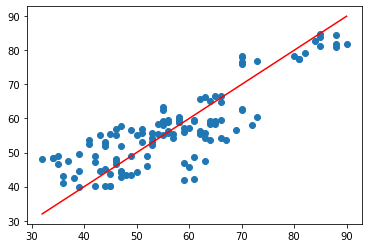

In [45]:
# 5

Ylin = np.linspace(realest['Price'].min(), realest['Price'].max(), 100)
plt.scatter(realest['Price'], fitted_red.fittedvalues)
plt.plot(Ylin, Ylin, color='red')
plt.show()

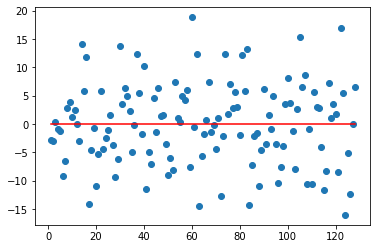

In [46]:
#1. (i, e_i)
xrang = np.arange(1, len(fitted_red.resid) + 1)
plt.scatter(xrang, fitted_red.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')

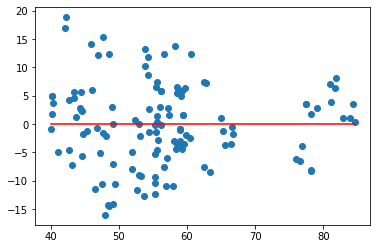

In [47]:
#2. (\hat{y}_i, e_i)
xrang = np.arange(fitted_red.fittedvalues.min(), fitted_red.fittedvalues.max(), 0.1)
plt.scatter(fitted_red.fittedvalues, fitted_red.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')

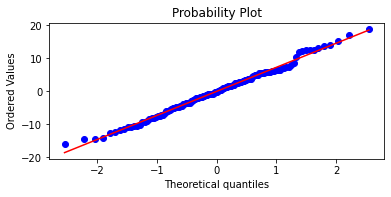

In [48]:
fig, ax = plt.subplots(figsize=(6, 2.5))
sp.stats.probplot(fitted_red.resid, plot=ax, dist ='norm', fit=True)
plt.show()